In [6]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 어떤 데이터셋이 사라집니다 같은 문구 뺴고 오류만 출력시키는거 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D, axes3d

Text(0, 0.5, '특성1')

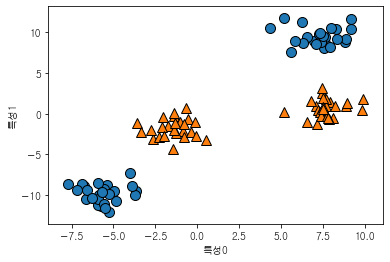

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2 

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성0")
plt.ylabel("특성1")


Text(0, 0.5, '특성 1')

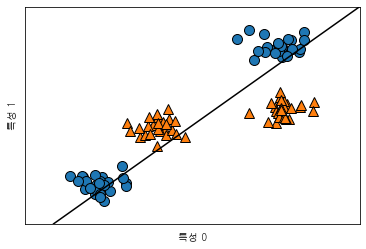

In [5]:
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1**2')

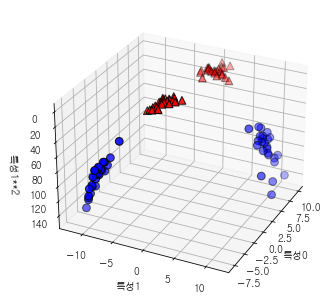

In [8]:
X_new = np.hstack([X,X[:,1:] **2])
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")



Text(0.5, 0, '특성1**2')

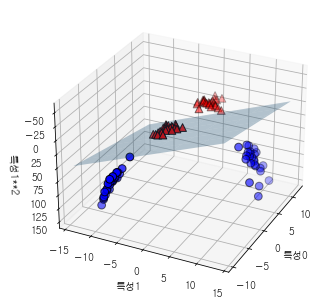

In [9]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1],X_new[mask,2],c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker="^", cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")



Text(0, 0.5, '특성 1')

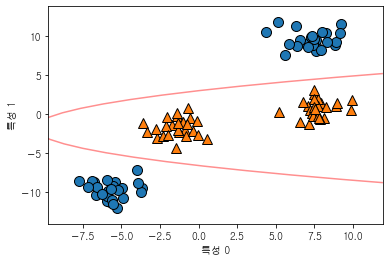

In [10]:
ZZ = YY ** 2 
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contour(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0, 0.5, '특성 1')

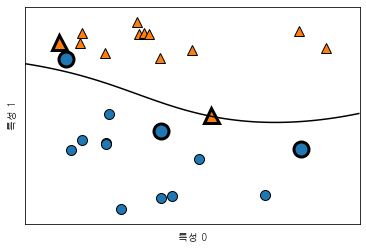

In [11]:
from sklearn.svm import SVC 
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


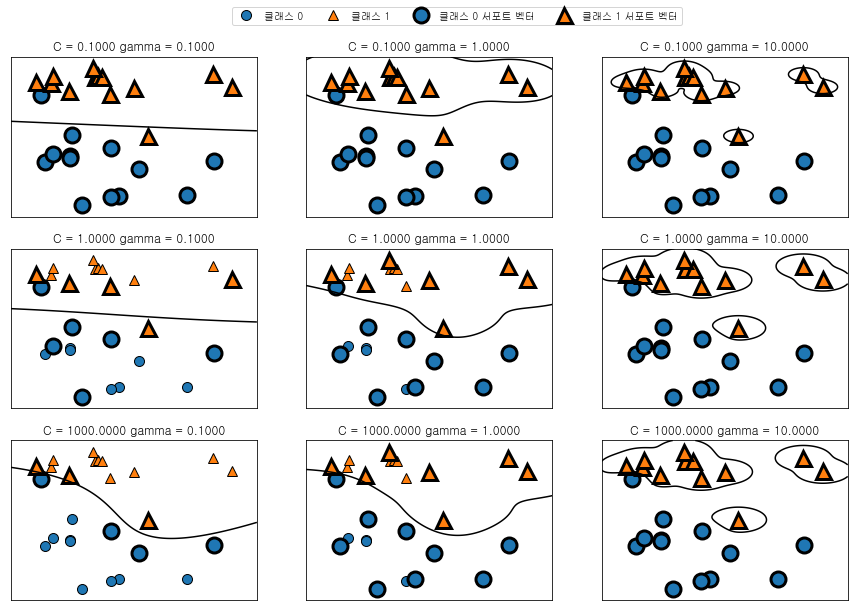

In [12]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a , gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"], ncol=4,loc=(.9,1.2))

In [14]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))


훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

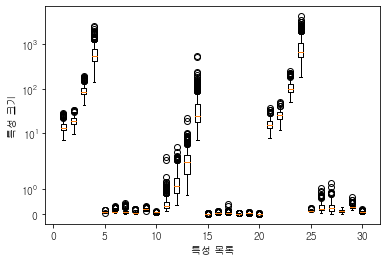

In [16]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")


In [17]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))


특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [20]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979
